Load data and import libraries

In [1]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

comments = data['comment'].apply(str)

### Preprocess data:
1. remove java tags
2. remove all special characters and accents
3. turn all characters into lower case
4. stemming --> put the word into its most basic form

In [2]:
comments = comments.apply(DataProcesser.preprocess)

comments.head()



0                                           taken from
1             icon settooltiptext predviewmodel getloc
2    synchron chang of the underli date valu with t...
3    ask the user realli want to close the given da...
4                                            css inmat
Name: comment, dtype: object

Split words and put them into a list

In [3]:
split_comments = " ".join(comments)
split_comments = split_comments.split()
split_comments[0:15]

['taken',
 'from',
 'icon',
 'settooltiptext',
 'predviewmodel',
 'getloc',
 'synchron',
 'chang',
 'of',
 'the',
 'underli',
 'date',
 'valu',
 'with',
 'the']

count word frequency

In [4]:
from collections import Counter
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}

{'taken': 9,
 'from': 105,
 'icon': 33,
 'settooltiptext': 8,
 'predviewmodel': 1,
 'getloc': 4,
 'synchron': 1,
 'chang': 103,
 'of': 317,
 'the': 1405,
 'underli': 2,
 'date': 13,
 'valu': 63,
 'with': 103,
 'temporalaccessorvalu': 1}

15 most common words

In [5]:
most_occur = counted_comments.most_common(15)
most_occur


[('the', 1405),
 ('to', 639),
 ('a', 452),
 ('is', 346),
 ('of', 317),
 ('in', 272),
 ('and', 266),
 ('it', 209),
 ('file', 197),
 ('be', 179),
 ('that', 153),
 ('we', 149),
 ('method', 145),
 ('en', 141),
 ('use', 133)]

most common words after removing stopwords

In [6]:
from helpers.textual_analysis import *

counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1405),
 ('to', 639),
 ('a', 452),
 ('is', 346),
 ('of', 317),
 ('in', 272),
 ('and', 266),
 ('it', 209),
 ('file', 197),
 ('be', 179),
 ('that', 153),
 ('we', 149),
 ('method', 145),
 ('en', 141),
 ('use', 133)]

Word Cloud

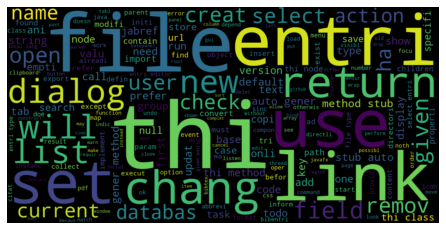

In [7]:
create_word_cloud(comments)

Non-information 'yes' comments

In [8]:
bad_comments = data[data['non-information'] == 'yes']
bad_comments = bad_comments['comment'].apply(str)


bad_comments = bad_comments.apply(DataProcesser.preprocess)

bad_comments[:15]

0                                            taken from
1              icon settooltiptext predviewmodel getloc
3     ask the user realli want to close the given da...
6                                          each en type
9                  ly add thing to the current open tab
16                                        db file exist
19                      dir must be a folder not a file
22                                                 save
40                                clear the current log
42                                     revert the chang
45          get the search describ a given search queri
48              return the hashmap contain all key bind
52                  add the given entri to node s group
54                                                     
55                                      bug report bodi
Name: comment, dtype: object

What words are most common among the non-information 'yes' comments?

In [9]:
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 154),
 ('gener', 58),
 ('method', 57),
 ('auto', 57),
 ('stub', 54),
 ('to', 49),
 ('a', 43),
 ('of', 29),
 ('file', 26),
 ('given', 23),
 ('en', 23),
 ('and', 23),
 ('css', 22),
 ('key', 20),
 ('return', 19)]

Word Cloud of non-information 'yes' comments

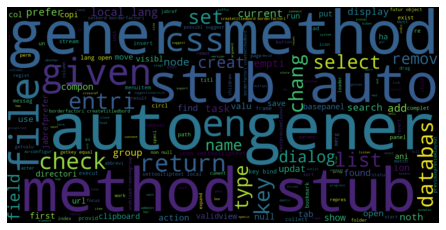

In [10]:
# Generate a word cloud image
create_word_cloud(bad_comments)

Non-information 'no' comments

In [12]:
data.head()
good_comments = data[data['non-information'] == 'no']
good_comments = good_comments['comment'].apply(str)

#clean data
good_comments = good_comments.apply(DataProcesser.preprocess)

good_comments.head()

2    synchron chang of the underli date valu with t...
4                                            css inmat
5    check there is a type with the same name so is...
7    to usernam main and ident should be includ as ...
8    alreadi pars via command line paramet e g jabr...
Name: comment, dtype: object

What words are most common among the non-information 'no' comments?

In [13]:
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1250),
 ('to', 578),
 ('a', 407),
 ('is', 328),
 ('of', 286),
 ('in', 259),
 ('and', 243),
 ('it', 191),
 ('file', 171),
 ('be', 168),
 ('that', 143),
 ('we', 138),
 ('use', 127),
 ('not', 116),
 ('en', 116)]

Non-information 'no' comments

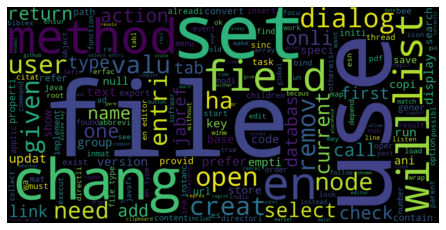

In [14]:
# Generate a word cloud image
create_word_cloud(good_comments)


Remove stopwords from comments

In [15]:
comments = comments.apply(lambda x: DataProcesser.remove_stopwords(x))
comments.head()

0                                                taken
1             icon settooltiptext predviewmodel getloc
2    synchron chang underli date valu temporalacces...
3             ask user realli want close given databas
4                                            css inmat
Name: comment, dtype: object

Most frequent words, removed stopwords

In [16]:
counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('file', 197),
 ('method', 145),
 ('en', 141),
 ('use', 133),
 ('set', 109),
 ('chang', 103),
 ('type', 93),
 ('field', 91),
 ('given', 85),
 ('dialog', 85),
 ('entri', 85),
 ('gener', 81),
 ('list', 77),
 ('creat', 76),
 ('open', 72)]

Most frequent words- non-information 'yes', removed stopwords

In [18]:
bad_comments = bad_comments.apply(lambda x: DataProcesser.remove_stopwords(x))
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('gener', 58),
 ('method', 57),
 ('auto', 57),
 ('stub', 54),
 ('file', 26),
 ('given', 23),
 ('en', 23),
 ('css', 22),
 ('key', 20),
 ('return', 19),
 ('entri', 17),
 ('check', 17),
 ('databas', 14),
 ('chang', 13),
 ('list', 13)]

Most frequent words- non-information 'no', removed stopwords

In [20]:
good_comments = good_comments.map(lambda x: DataProcesser.remove_stopwords(x))
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('file', 171),
 ('use', 127),
 ('en', 116),
 ('set', 96),
 ('chang', 90),
 ('method', 88),
 ('type', 81),
 ('field', 79),
 ('dialog', 72),
 ('entri', 65),
 ('creat', 64),
 ('list', 62),
 ('given', 62),
 ('open', 61),
 ('user', 58)]